In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
#importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [97]:
#reading csv file
data = pd.read_csv('/content/drive/MyDrive/new_election_dataset (1).csv')
data.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Date
0,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,17,0,34.33,35.95,2187,7,7,0
1,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,1,0,7.47,7.82,476,1,2,0
2,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,2,0,6.14,6.43,391,1,1,0
3,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,11,0,2.39,2.50,152,0,0,0
4,0,8,0,0,16,147,12,186,2.92,101,...,12511,6826,10,0,2.04,2.14,130,0,0,0


In [98]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [152]:
# Preparing Data set
# dropping Final Mandate variable from X
#assign the value of y for training
x = data.drop(columns=['FinalMandates'])
y = data[["FinalMandates"]]
y = y.values.reshape(-1, 1)  # Reshape to make it a 2D array

In [153]:
#Standardizing value of x by using standardscalar to make the data normally distributed
sc = StandardScaler()
a = sc.fit_transform(x)
df_new_x = pd.DataFrame(a,columns=x.columns)
df_new_x.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,Date
0,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,1.177919,-0.206043,4.612609,4.603604,-0.190208,4.560088,-0.421705
1,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,-1.435236,-0.206043,0.644624,0.642757,-0.282371,0.445033,-0.421705
2,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,-1.271914,-0.206043,0.448145,0.447038,-0.286949,0.445033,-0.421705
3,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,0.197986,-0.206043,-0.105837,-0.106326,-0.299823,-0.240810,-0.421705
4,-1.752045,-1.206238,-1.741356,-0.767282,0.979379,-0.099227,-1.394293,-0.87551,0.540356,-0.95077,...,-0.133418,-0.900191,-0.845089,0.034664,-0.206043,-0.157542,-0.157016,-0.301008,-0.240810,-0.421705


In [154]:
#Splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(df_new_x,y,test_size=0.20,random_state=45)

**Without Hyper parameter tuning**

In [102]:
model= DecisionTreeRegressor(random_state=42)
model.fit(x_train,y_train)
score=model.score(x_train,y_train)
predm=model.predict(x_test)
MSE_before_tuning = mean_absolute_error(y_test,predm)
print('Score of',model,'is:',score)
print('MAE:',mean_absolute_error(y_test,predm))
print('MSE:',mean_squared_error(y_test,predm))
print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
print('R2 score:',r2_score(y_test,predm))
print('*'*100)
print('\n')

Score of DecisionTreeRegressor(random_state=42) is: 1.0
MAE: 0.0002727024815925825
MSE: 0.0002727024815925825
RMSE: 0.016513705870960113
R2 score: 0.9998700090217355
****************************************************************************************************




**With Hyper Parameter Tuning**

In [103]:
model1 = DecisionTreeRegressor(random_state=42)
# Using GridSearchCV for HyperParameter Tuning
grid_search = GridSearchCV(estimator=model1, param_grid={'max_depth': [None, 10, 20], 'min_samples_split': [2,5,10], 'min_samples_leaf': [1,2,4]}, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Retreiving the best model with optimal hyperparameters
best_model = grid_search.best_estimator_

# Making Predtions with the best model
predm1 = best_model.predict(x_test)

mse_after_tuning = mean_squared_error(y_test, predm1)

# printing Results and Evaluation Metrics
print(f'Best parameters for {model1}: {grid_search.best_params_}')
print('MAE:', mean_absolute_error(y_test, predm))
print('MSE:', mean_squared_error(y_test, predm))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predm)))
print('R2 score:', r2_score(y_test, predm))
print('*' * 100)
print('\n')

Best parameters for DecisionTreeRegressor(random_state=42): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
MAE: 0.0002727024815925825
MSE: 0.0002727024815925825
RMSE: 0.016513705870960113
R2 score: 0.9998700090217355
****************************************************************************************************




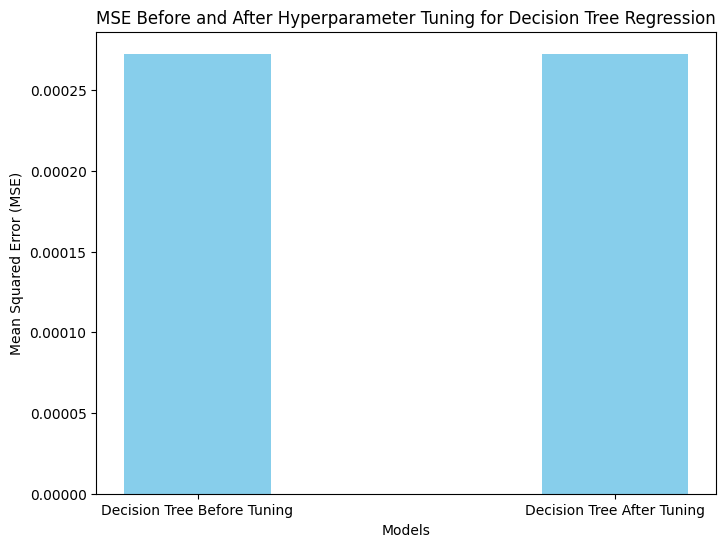

In [104]:
# Bar plot
models_names = ['Decision Tree Before Tuning', 'Decision Tree After Tuning']

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(models_names))

plt.bar(index, [MSE_before_tuning, mse_after_tuning], width=bar_width, color='skyblue')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Before and After Hyperparameter Tuning for Decision Tree Regression')
plt.xticks(index, models_names)
plt.show()


**XGB Regressor without Hyper parameter Tuning**




In [105]:
xgb_before_tuning = XGBRegressor(random_state=42)
xgb_before_tuning.fit(x_train, y_train)
y_pred_before = xgb_before_tuning.predict(x_test)
mse_before_tuning_XGB = mean_squared_error(y_test, y_pred_before)
print(mse_before_tuning_XGB)

0.0003445863762973193


**XGB Regressor with Hyper parameter Tuning**




In [106]:
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid={'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100,200,300], 'max_depth': [3,4,5], 'min_child_weight': [1,2,3]}, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)
best_xgb_after_tuning = grid_search.best_estimator_
y_pred_after_tuning = best_xgb_after_tuning.predict(x_test)
mse_after_tuning_XGB = mean_squared_error(y_test, y_pred_after_tuning)

In [107]:
print(mse_after_tuning_XGB)

0.0004586255743918887


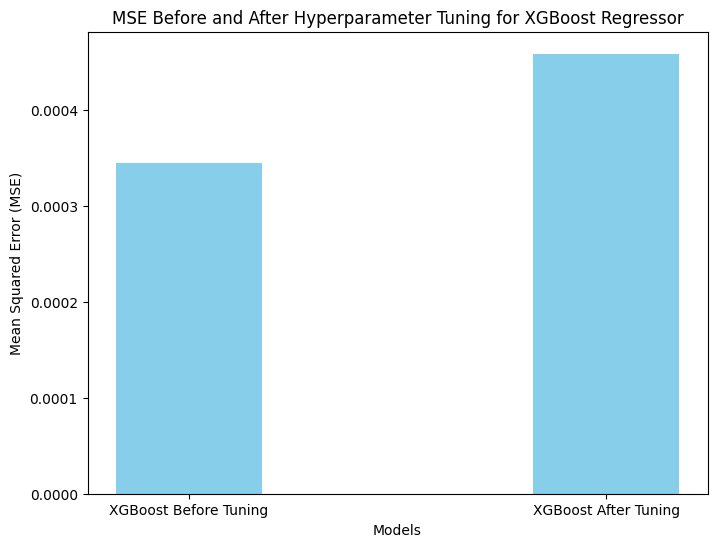

In [108]:
# Bar plot
models_names = ['XGBoost Before Tuning', 'XGBoost After Tuning']

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(models_names))

plt.bar(index, [mse_before_tuning_XGB, mse_after_tuning_XGB], width=bar_width, color='skyblue')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Before and After Hyperparameter Tuning for XGBoost Regressor')
plt.xticks(index, models_names)
plt.show()


**Extreme Learning Machine**

In [120]:
class ELMRegressor:
    def __init__(self, n_input, n_hidden, activation_function=np.tanh):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.activation_function = activation_function
        self.weights_input_hidden = None
        self.bias_hidden = None
        self.weights_hidden_output = None

    def _initialize_weights(self):
        self.weights_input_hidden = np.random.rand(self.n_input, self.n_hidden)
        self.bias_hidden = np.random.rand(1, self.n_hidden)
        self.weights_hidden_output = np.random.rand(self.n_hidden, 1)

    def _activation(self, x):
        return self.activation_function(x)

    def train(self, X, y):
        self._initialize_weights()

        # Calculate hidden layer output
        hidden_output = self._activation(np.dot(X, self.weights_input_hidden) + self.bias_hidden)

        # Calculate output layer weights using the Moore-Penrose pseudoinverse
        self.weights_hidden_output = np.dot(np.linalg.pinv(hidden_output), y)

    def predict(self, X):
        hidden_output = self._activation(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        output = np.dot(hidden_output, self.weights_hidden_output)
        return output
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

In [121]:
elm = ELMRegressor(n_input = x_train.shape[1], n_hidden=50)
elm.train(x_train, y_train)

In [129]:
y_pred_train_ELM = elm.predict(x_train)
y_pred_test_ELM = elm.predict(x_test)

In [133]:
mse_train = elm.mse(y_train, y_pred_train_ELM)
print(mse_train)
mse_test = elm.mse(y_test, y_pred_test_ELM)
print(mse_test)

1.8094103259568297
1.7966060903506333


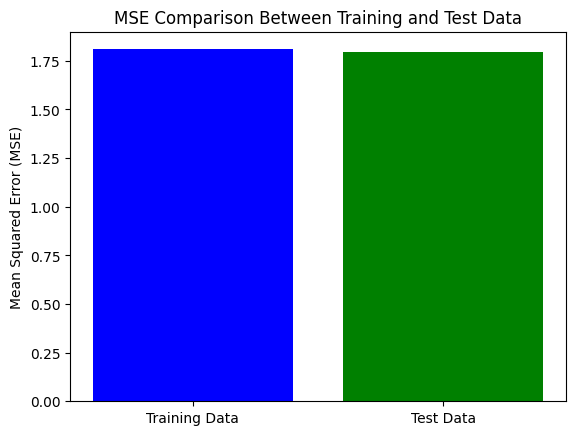

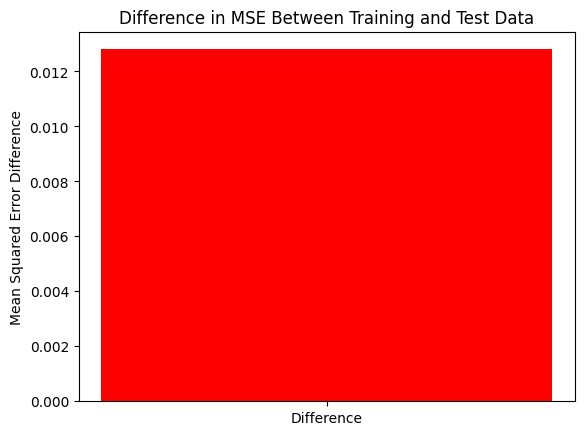

In [135]:
# Plot bar chart for MSE
labels = ['Training Data', 'Test Data']
mse_values = [mse_train, mse_test]

plt.bar(labels, mse_values, color=['blue', 'green'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison Between Training and Test Data')
plt.show()

# Plot the difference in MSE between training and test data
mse_difference = np.abs(mse_train - mse_test)
plt.bar(['Difference'], [mse_difference], color='red')
plt.ylabel('Mean Squared Error Difference')
plt.title('Difference in MSE Between Training and Test Data')
plt.show()

**A Basic Deep Learning Model with two layers**

In [155]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [157]:
# Build the model
model = Sequential([
    # Input layer (specify the input shape for the first layer)
    Dense(units=10, activation='relu', input_shape=(x_train.shape[1],)),

    # Hidden layer
    Dense(units=5, activation='relu'),

    # Output layer
    Dense(units=1, activation='linear')  # Assuming it's a regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Assuming it's a regression task

# Print the model summary
model.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                290       
                                                                 
 dense_22 (Dense)            (None, 5)                 55        
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


115/115 [==============================] - 0s 2ms/step
Mean Squared Error (MSE) on training data: 4.068193624997948
Mean Squared Error (MSE) on test data: 4.204130928743757


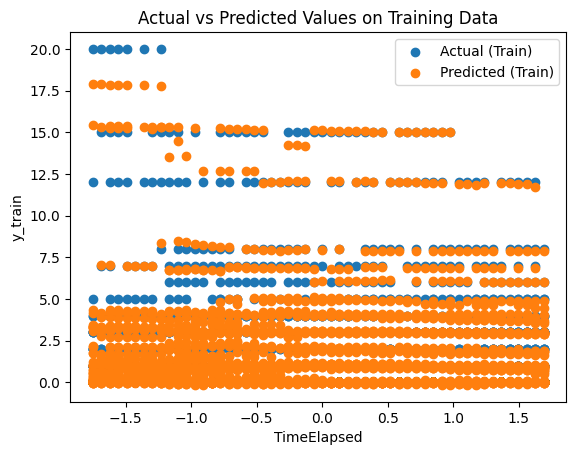

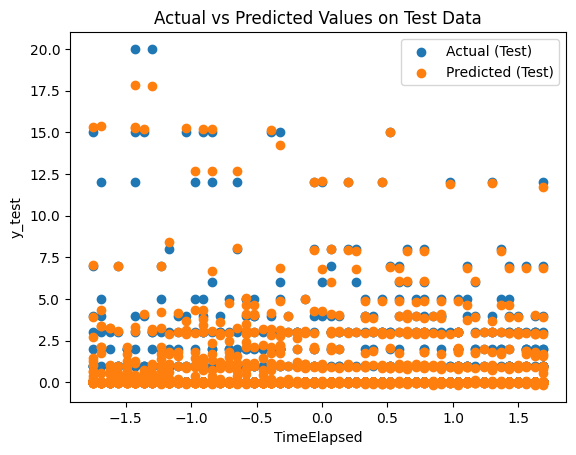

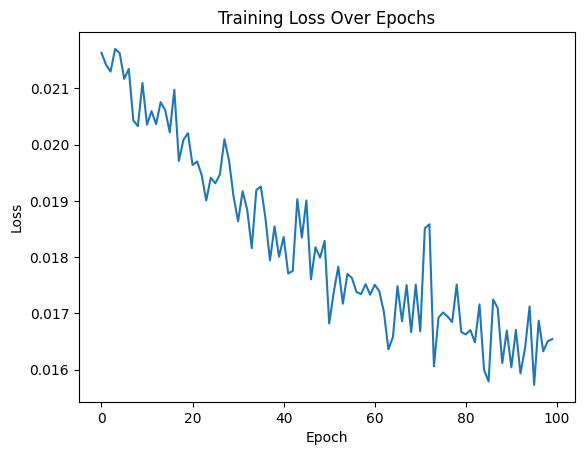

In [162]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on training and test data
y_pred_train = model.predict(x_train).flatten()
y_pred_test = model.predict(x_test).flatten()

# Calculate Mean Squared Error (MSE) on training and test data
mse_train = np.mean((y_train - y_pred_train)**2)
mse_test = np.mean((y_test - y_pred_test)**2)

print("Mean Squared Error (MSE) on training data:", mse_train)
print("Mean Squared Error (MSE) on test data:", mse_test)

# Plot actual vs predicted values on training data
plt.scatter(x_train.iloc[:, 0], y_train, label='Actual (Train)')
plt.scatter(x_train.iloc[:, 0], y_pred_train, label='Predicted (Train)')
plt.xlabel(x_train.columns[0])
plt.ylabel('y_train')
plt.legend()
plt.title('Actual vs Predicted Values on Training Data')
plt.show()

# Plot actual vs predicted values on test data
plt.scatter(x_test.iloc[:, 0], y_test, label='Actual (Test)')
plt.scatter(x_test.iloc[:, 0], y_pred_test, label='Predicted (Test)')
plt.xlabel(x_test.columns[0])
plt.ylabel('y_test')
plt.legend()
plt.title('Actual vs Predicted Values on Test Data')
plt.show()

# Plot training loss over epochs
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()


In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the data
data = pd.read_csv('/content/drive/MyDrive/new_election_dataset (1).csv')

# Preparing the dataset
X = data.drop(columns=['FinalMandates'])
y = data['FinalMandates']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model 1: RandomForestRegressor with Hyperparameter Tuning
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf_model, rf_params, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Model 2: DecisionTreeRegressor with Hyperparameter Tuning
dt_params = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_model = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(dt_model, dt_params, cv=5)
grid_search_dt.fit(X_train, y_train)
best_dt_model = grid_search_dt.best_estimator_

# Model 3: XGBRegressor with Hyperparameter Tuning
xgb_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
xgb_model = XGBRegressor(random_state=42)
grid_search_xgb = GridSearchCV(xgb_model, xgb_params, cv=5)
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_

# Ensemble model using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('rf', best_rf_model),
    ('dt', best_dt_model),
    ('xgb', best_xgb_model)
])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
ensemble_preds = ensemble_model.predict(X_test)

# Evaluate the ensemble model
ensemble_mse = mean_squared_error(y_test, ensemble_preds)
print("Ensemble Model Mean Squared Error (MSE):", ensemble_mse)


Ensemble Model Mean Squared Error (MSE): 0.0015516642879219696


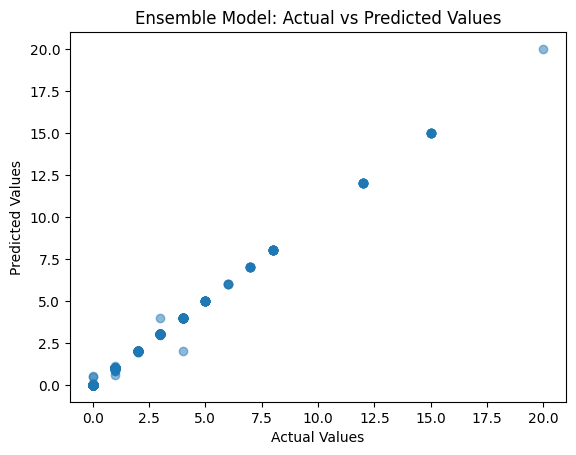

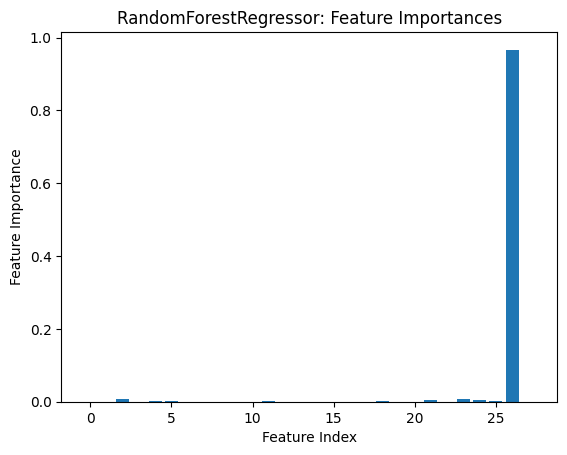

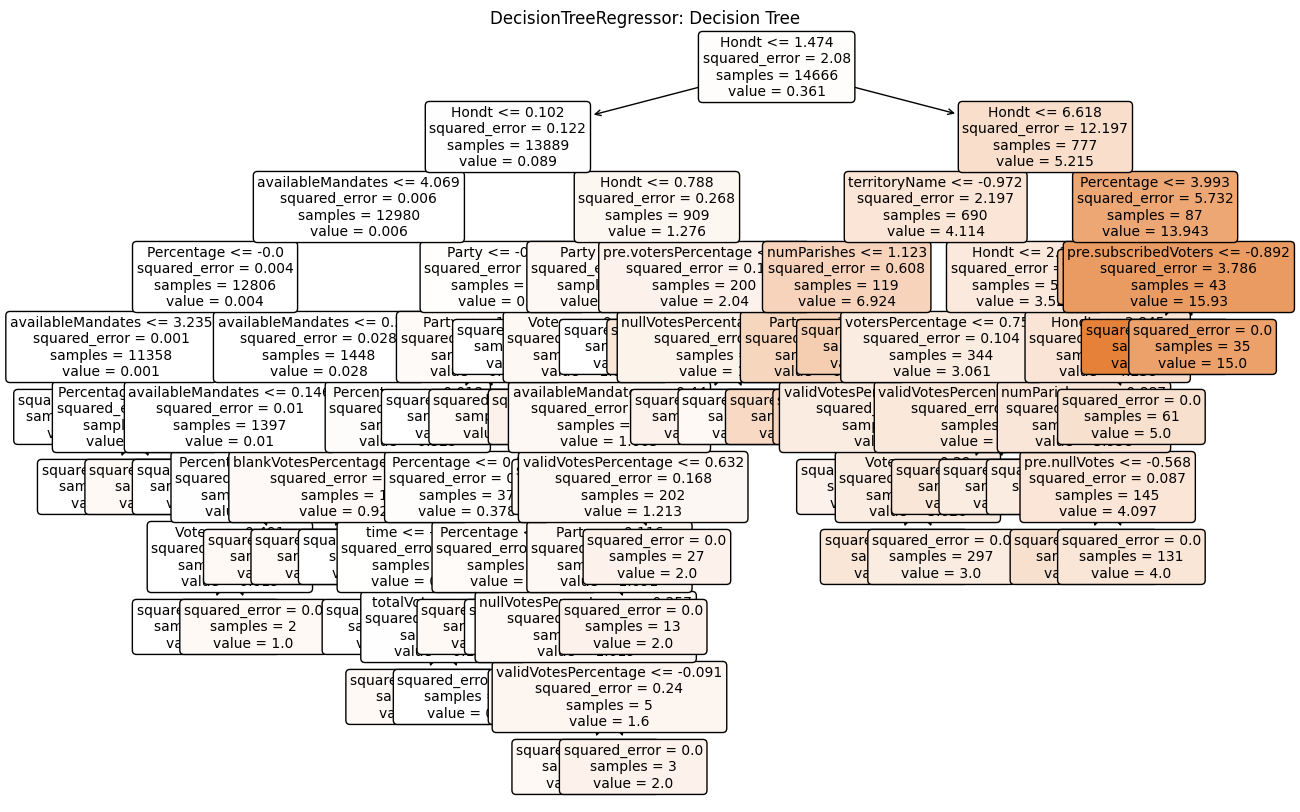

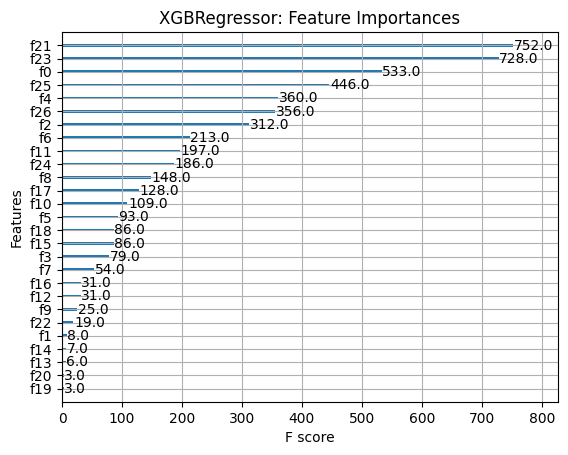

In [166]:
from xgboost import plot_importance
from sklearn.tree import plot_tree
# Plot actual vs predicted values for the ensemble model
plt.scatter(y_test, ensemble_preds, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ensemble Model: Actual vs Predicted Values")
plt.show()

# Plot feature importances for RandomForestRegressor
feature_importances_rf = best_rf_model.feature_importances_
plt.bar(range(len(feature_importances_rf)), feature_importances_rf)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("RandomForestRegressor: Feature Importances")
plt.show()

# Plot the tree from DecisionTreeRegressor
plt.figure(figsize=(15, 10))
plot_tree(best_dt_model, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.title("DecisionTreeRegressor: Decision Tree")
plt.show()

# Plot feature importances for XGBRegressor
plot_importance(best_xgb_model)
plt.title("XGBRegressor: Feature Importances")
plt.show()